# Importation des librairie et la dataset

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
# Importation des données à partir d'un fichier CSV
df = pd.read_csv('aims_house_data.csv')

# Exploration initiale des données
print(df.head())  # Affiche les premières lignes du DataFrame
print(df.info())  # Affiche les informations sur les colonnes et les types de données


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

# Analyse exploratoire

In [50]:
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [52]:
# Conversion du type de données de la colonne 'date'
df['date'] = pd.to_datetime(df['date'])

# Vérification des valeurs manquantes
print(df.isnull().sum())

# Vérification des incohérences et des erreurs
print(df.describe())  # Résumé statistique des colonnes numériques
print(df['bedrooms'].value_counts())  # Vérification des valeurs uniques dans la colonne 'bedrooms'

# Suppression des colonnes inutiles
cols_to_drop = ['id', 'zipcode']  # Liste des colonnes à supprimer
df = df.drop(cols_to_drop, axis=1)

# Exportation des données nettoyées vers un nouveau fichier CSV
df.to_csv('donnees_nettoyees.csv', index=False)


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05  

Valeurs manquantes :  il semble qu'il n'y ait aucune valeur manquante dans aucune des colonnes, car le résultat affiche des zéros pour toutes les colonnes.

Résumé statistique : . Les statistiques  incluent le compte (nombre d'observations non manquantes), la moyenne, l'écart-type, les valeurs minimales, les quartiles (25e, 50e et 75e) et les valeurs maximales de chaque colonne numérique.

Par exemple, pour la colonne 'price',  le prix moyen des maisons est d'environ 540 088 dollars, avec une valeur minimale de 75 000 dollars et une valeur maximale de 7 700 000 dollars. Les autres colonnes numériques ont également leurs statistiques résumées de manière similaire.

Valeurs uniques dans la colonne 'bedrooms' :  permet de voir combien de maisons ont un certain nombre de chambres. Par exemple, vous pouvez voir qu'il y a 9 824 maisons avec 3 chambres, 6 882 maisons avec 4 chambres, 2 760 maisons avec 2 chambres, etc.

selon les résultats affichés dans la colonne 'bedrooms', il y a une maison qui a 33 chambres. Cela peut sembler inhabituel, alors ous allons faire une analyse approfondit s'il afin de pouvoir comprendre
   
   

In [7]:
house_33_bedrooms = df[df['bedrooms'] == 33]
print(house_33_bedrooms)


            date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15870 2014-06-25  640000.0        33       1.75         1620      6000   

       floors  view  sqft_above  sqft_basement  ...  grade_6  grade_7  \
15870     1.0     0        1040            580  ...        0        1   

       grade_8  grade_9  grade_10  grade_11  grade_12  grade_13  waterfront_0  \
15870        0        0         0         0         0         0             1   

       waterfront_1  
15870             0  

[1 rows x 35 columns]


un seul entré contenant 33

In [8]:
houses_high_bedrooms = df[df['bedrooms'] > 10]
print(houses_high_bedrooms)


            date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
8757  2014-08-21  520000.0        11       3.00         3000      4960   
15870 2014-06-25  640000.0        33       1.75         1620      6000   

       floors  view  sqft_above  sqft_basement  ...  grade_6  grade_7  \
8757      2.0     0        2400            600  ...        0        1   
15870     1.0     0        1040            580  ...        0        1   

       grade_8  grade_9  grade_10  grade_11  grade_12  grade_13  waterfront_0  \
8757         0        0         0         0         0         0             1   
15870        0        0         0         0         0         0             1   

       waterfront_1  
8757              0  
15870             0  

[2 rows x 35 columns]


Ces deux entrées présentent des caractéristiques inhabituelles. La première a 11 chambres, ce qui peut sembler élevé, tandis que la deuxième a 33 chambres, ce qui est encore plus inhabituel

In [9]:
suspect_entries = df[df['bedrooms'] == 33]
print(suspect_entries)


            date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15870 2014-06-25  640000.0        33       1.75         1620      6000   

       floors  view  sqft_above  sqft_basement  ...  grade_6  grade_7  \
15870     1.0     0        1040            580  ...        0        1   

       grade_8  grade_9  grade_10  grade_11  grade_12  grade_13  waterfront_0  \
15870        0        0         0         0         0         0             1   

       waterfront_1  
15870             0  

[1 rows x 35 columns]


Comme nous l'avons dit précédemment, cette entrée présente une caractéristique inhabituelle, à savoir le nombre de chambres qui est de 33. nous pensons a une erreur de frappe et ainsi nous allons poroposer de suprimer

In [10]:
# Supprimer l'entrée avec 33 chambres
df = df.drop(df[df['bedrooms'] == 33].index)

# Vérifier le nouveau dataframe après suppression
print(df)


            date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3       1.00         1180      5650   
1     2014-12-09  538000.0         3       2.25         2570      7242   
2     2015-02-25  180000.0         2       1.00          770     10000   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21608 2014-05-21  360000.0         3       2.50         1530      1131   
21609 2015-02-23  400000.0         4       2.50         2310      5813   
21610 2014-06-23  402101.0         2       0.75         1020      1350   
21611 2015-01-16  400000.0         3       2.50         1600      2388   
21612 2014-10-15  325000.0         2       0.75         1020      1076   

       floors  view  sqft_above  sqft_basement  ...  grade_6  grade_7  \
0         1.0     0        1180       

# Visualisation 

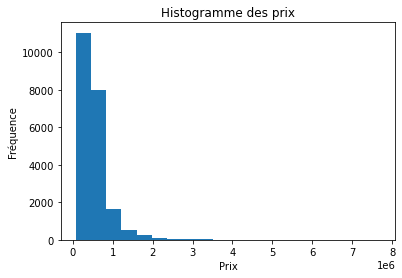

In [11]:
#  Histogramme des prix
plt.hist(df['price'], bins=20)
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.title('Histogramme des prix')
plt.show()

la visualisation de la repartion des prix , nous pouvons comprendre que  qu'il y a plus de 10 000 observations dans cet intervalle particulier. Cela peut indiquer une concentration de données ou une distribution déséquilibrée des prix dans cette gamme spécifique


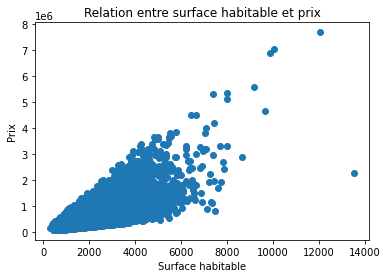

In [12]:
# Tracer un diagramme de dispersion entre 'sqft_living' et 'price'
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('Surface habitable')543.
plt.ylabel('Prix')
plt.title('Relation entre surface habitable et prix')
plt.show()

il montre comment la surface habitable des maisons est associée aux prix correspondants.

In [38]:
maisons_plus_cheres = df.sort_values(by='price', ascending=False)
print(maisons_plus_cheres.head())


           date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
7252 2014-10-13  7700000.0         6       8.00        12050     27600   
3914 2014-06-11  7062500.0         5       4.50        10040     37325   
9254 2014-09-19  6885000.0         6       7.75         9890     31374   
4411 2014-08-04  5570000.0         5       5.75         9200     35069   
1448 2015-04-13  5350000.0         5       5.00         8000     23985   

      floors  view  sqft_above  sqft_basement  ...  grade_6  grade_7  grade_8  \
7252     2.5     3        8570           3480  ...        0        0        0   
3914     2.0     2        7680           2360  ...        0        0        0   
9254     2.0     4        8860           1030  ...        0        0        0   
4411     2.0     0        6200           3000  ...        0        0        0   
1448     2.0     4        6720           1280  ...        0        0        0   

      grade_9  grade_10  grade_11  grade_12  grade_13  waterfront_0 

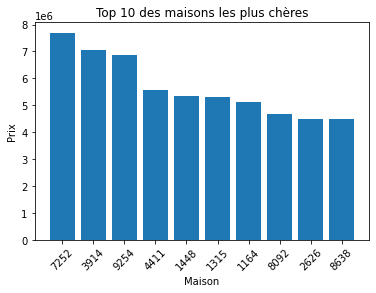

In [41]:
# Tri des maisons par prix décroissant
maisons_plus_cheres = df.sort_values(by='price', ascending=False)

# Sélection des 10 maisons les plus chères
top_10_maisons = maisons_plus_cheres.head(10)

# Tracé du diagramme à barres
plt.bar(range(len(top_10_maisons)), top_10_maisons['price'])
plt.xlabel('Maison')
plt.ylabel('Prix')
plt.title('Top 10 des maisons les plus chères')
plt.xticks(range(len(top_10_maisons)), top_10_maisons.index, rotation=45)
plt.show()


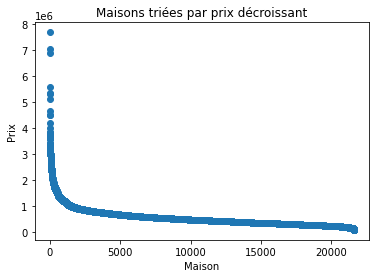

In [37]:
# Tri des maisons par prix décroissant
maisons_plus_cheres = df.sort_values(by='price', ascending=False)

# Tracé du diagramme de dispersion
plt.scatter(range(len(maisons_plus_cheres)), maisons_plus_cheres['price'])
plt.xlabel('Maison')
plt.ylabel('Prix')
plt.title('Maisons triées par prix décroissant')
plt.show()


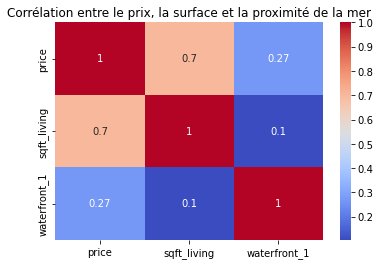

In [39]:
# Sélection des colonnes pertinentes
data = df[['price', 'sqft_living', 'waterfront_1']]

# Calcul de la matrice de corrélation
correlation_matrix = data.corr()

# Affichage de la matrice de corrélation sous forme de heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Corrélation entre le prix, la surface et la proximité de la mer')
plt.show()


generelement dans la vrais vie prix varie en fonction de certaine caraterisque comme surface nombre de chambre salles  de bain ... alors nous avons fait quelque analyse et representation graphique pour voir si  cella est pareil dans notre cas, nous avons pas ete du tout surpris, effectivement le prix d'une  est influencé par ses caractéristiques telles que le nombre de chambres, le nombre de salles de bains, la surface habitable, etc. 
Par exemple, plus le nombre de chambres ou de salles de bains est élevé, plus le prixest aussi eleve . De même, une plus grande surface habitable donne prix élévé.

Valeurs de corrélation :

Les valeurs de corrélation varient de -1 à 1.
Une valeur de corrélation de 1 indique une corrélation positive parfaite, ce qui signifie que les variables augmentent ensemble de manière linéaire. ici nous pouvons dire que le prix de maison vari en fonction de la surperfice et de la proximité de la mer  il y'a un lien entre la surface et la proximité de la mer

Équation de la courbe de tendance :
 
280.6 x - 4.358e+04


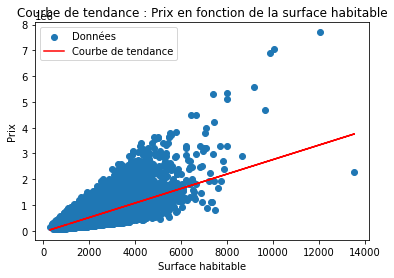

In [54]:
# Calculer la courbe de tendance en utilisant la fonction polyfit de numpy
courbe_tendance = np.polyfit(df['sqft_living'], df['price'], 1)
fonction_tendance = np.poly1d(courbe_tendance)

# Afficher le résultat du calcul de la courbe de tendance
print("Équation de la courbe de tendance :")
print(fonction_tendance)

# Tracer les points de données et la courbe de tendance
plt.scatter(df['sqft_living'], df['price'], label='Données')
plt.plot(df['sqft_living'], fonction_tendance(df['sqft_living']), color='red', label='Courbe de tendance')

# Personnaliser le graphique
plt.xlabel('Surface habitable')
plt.ylabel('Prix')
plt.title('Courbe de tendance : Prix en fonction de la surface habitable')
plt.legend()

# Afficher le graphique
plt.show()


L'équation de la courbe de tendance pour le prix en fonction de la surface habitable est :

Prix = 280.6 * Surface habitable - 4.358e+04

Dans cette équation, le coefficient devant la variable "Surface habitable" est de 280.6. il y a une augmentation de 280.6 unités de prix pour chaque unité de surface habitable supplémentaire.

Le terme constant de -4.358e+04 représente le prix de base, c'est-à-dire lorsque la surface habitable est égale à zéro. le prix de départ est de -4.358e+04 (ou -43,580). 

La courbe de tendance représente une ligne droite dans ce cas, car nous avons utilisé une régression linéaire pour ajuster les données. Cela signifie que nous supposons une relation linéaire entre le prix et la surface habitable.

En interprétant le résultat, vous pouvez dire que selon cette analyse, une augmentation de la surface habitable est associée à une augmentation du prix de 280.6 unités


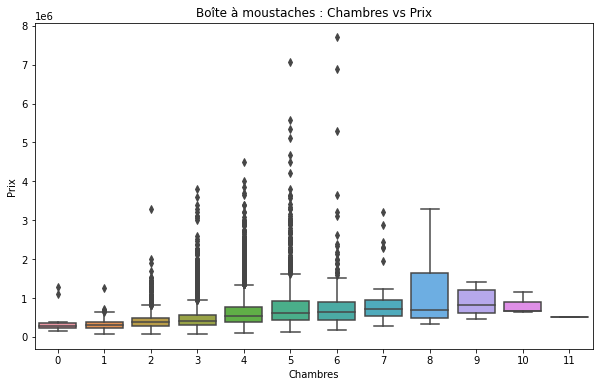

In [13]:
#  Boîte à moustaches : Chambres vs Prix
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['bedrooms'], y=df['price'])
plt.xlabel('Chambres')
plt.ylabel('Prix')
plt.title('Boîte à moustaches : Chambres vs Prix')
plt.show()


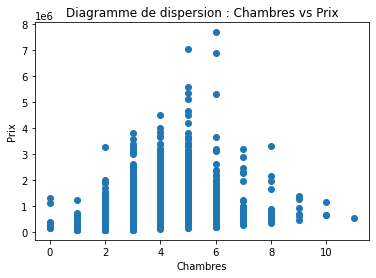

In [14]:
#  Diagramme de dispersion : Chambres vs Prix
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('Chambres')
plt.ylabel('Prix')
plt.title('Diagramme de dispersion : Chambres vs Prix')
plt.show()


Plus le nombre de chambres est élevé, plus la médiane des prix a tendance à augmenter. Cela suggère qu'il y a une relation positive entre le nombre de chambres et le prix des maisons.


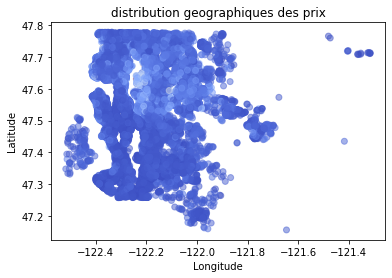

In [16]:
# distrubution géographique des prix
plt.scatter(df['long'], df['lat'], c=df['price'], cmap='coolwarm', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('distribution geographiques des prix')
plt.show()


 en observant le graphique de dispersion, on peut remarquer une concentration plus élevée des points entre les latitudes 47.3 et 47.8, ainsi qu'entre les longitudes -122.4 et -121.8. Cela suggère que la majorité des maisons se trouvent dans cette zone géographique spécifique.

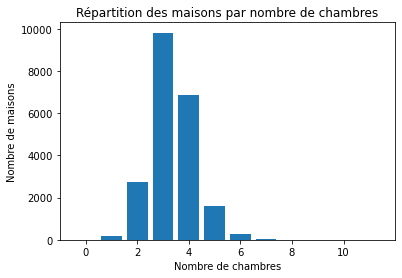

In [17]:
#  Diagramme à barres : Nombre de chambre par maison
bedroom_counts = df['bedrooms'].value_counts()
plt.bar(bedroom_counts.index, bedroom_counts.values)
plt.xlabel('Nombre de chambres')
plt.ylabel('Nombre de maisons')
plt.title('Répartition des maisons par nombre de chambres')
plt.show()


la répartition du nombre de chambres par maison

In [19]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,...,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,waterfront_0,waterfront_1
price,1.000000,0.315445,0.525147,0.702047,0.089664,0.256811,0.397299,0.605591,0.323812,0.054023,...,-0.209326,-0.315828,0.004713,0.235903,0.340803,0.357414,0.290836,0.211804,-0.266371,0.266371
bedrooms,0.315445,1.000000,0.529159,0.591467,0.032807,0.181085,0.081930,0.490600,0.309490,0.159167,...,-0.242905,-0.108770,0.075987,0.164987,0.139421,0.119469,0.060734,0.039900,0.006611,-0.006611
bathrooms,0.525147,0.529159,1.000000,0.754663,0.087735,0.500645,0.187732,0.685339,0.283789,0.506012,...,-0.365037,-0.312572,0.189352,0.264748,0.272434,0.247010,0.156661,0.094971,-0.063742,0.063742
sqft_living,0.702047,0.591467,0.754663,1.000000,0.172822,0.353937,0.284606,0.876597,0.435065,0.318037,...,-0.312106,-0.358500,0.071313,0.318414,0.369055,0.345769,0.238806,0.144329,-0.103816,0.103816
sqft_lot,0.089664,0.032807,0.087735,0.172822,1.000000,-0.005210,0.074707,0.183507,0.015293,0.053073,...,-0.019167,-0.067994,-0.024093,0.049544,0.074332,0.077034,0.061534,0.007758,-0.021603,0.021603
floors,0.256811,0.181085,0.500645,0.353937,-0.005210,1.000000,0.029432,0.523866,-0.245684,0.489302,...,-0.230449,-0.307437,0.201154,0.243787,0.173677,0.118566,0.054570,0.021227,-0.023695,0.023695
view,0.397299,0.081930,0.187732,0.284606,0.074707,0.029432,1.000000,0.167640,0.276959,-0.053452,...,-0.059614,-0.148025,0.009967,0.094474,0.128977,0.142416,0.117120,0.051602,-0.401857,0.401857
sqft_above,0.605591,0.490600,0.685339,0.876597,0.183507,0.523866,0.167640,1.000000,-0.051918,0.423879,...,-0.280473,-0.386767,0.059597,0.343191,0.376157,0.341967,0.223413,0.126576,-0.072072,0.072072
sqft_basement,0.323812,0.309490,0.283789,0.435065,0.015293,-0.245684,0.276959,-0.051918,1.000000,-0.133103,...,-0.122911,-0.020305,0.036481,0.018652,0.062061,0.077710,0.077557,0.062685,-0.080591,0.080591
yr_built,0.054023,0.159167,0.506012,0.318037,0.053073,0.489302,-0.053452,0.423879,-0.133103,1.000000,...,-0.313470,-0.211780,0.199827,0.219946,0.148721,0.098702,0.047051,0.004685,0.026165,-0.026165


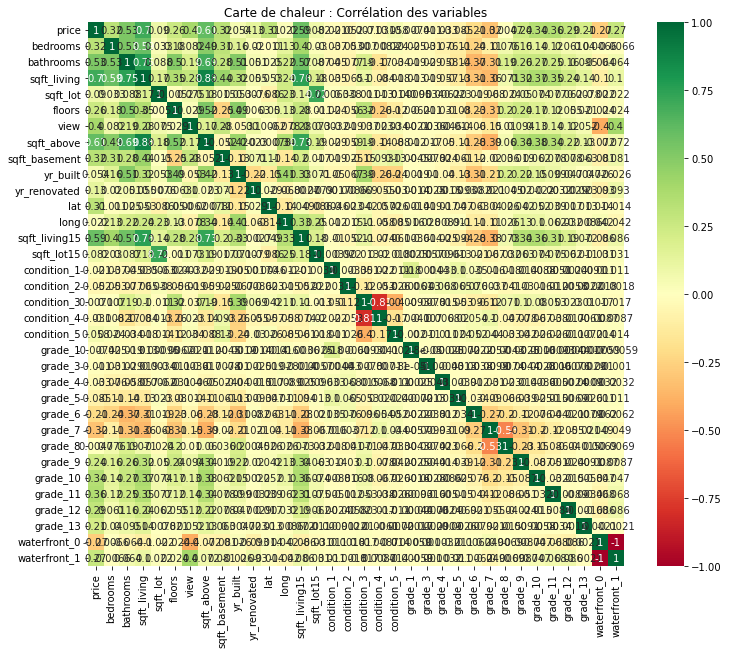

In [20]:
#  Carte de chaleur : Corrélation des variables
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Carte de chaleur : Corrélation des variables')
plt.show()


D'après la matrice, les variables qui semblent avoir la plus forte corrélation positive avec le prix sont :

"sqft_living" (0.702047) : la surface habitable de la maison.
"grade_9" (0.235903) : le niveau de qualité de la construction, correspondant à "très bon".
"bathrooms" (0.525147) : le nombre de salles de bain.
"sqft_above" (0.605591) : la surface habitable au-dessus du niveau du sol.
"view" (0.397299) : la qualité de la vue depuis la maison.
"sqft_living15" (0.585404) : la surface habitable moyenne des 15 maisons les plus proches.

# Représentation graphiquement la répartition des conditions des maisons dans le dataset. 

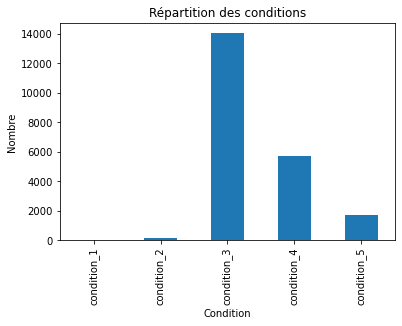

In [22]:
condition_counts = df[['condition_1', 'condition_2', 'condition_3', 'condition_4', 'condition_5']].sum()
condition_counts.plot(kind='bar')
plt.xlabel('Condition')
plt.ylabel('Nombre')
plt.title('Répartition des conditions')
plt.show()


Text(0, 0.5, 'Prix')

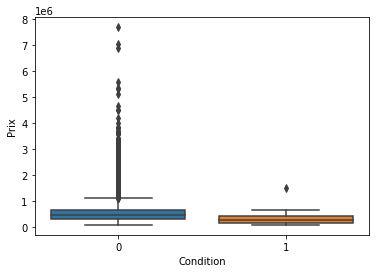

In [23]:
sns.boxplot(x=df['condition_1'], y=df['price'])
plt.xlabel('Condition')
plt.ylabel('Prix')



On peut observer les différences de médiane, d'écart interquartile et de dispersion des prix entre les différentes conditions, ce qui permet d'identifier les conditions qui sont associées à des prix plus élevés ou plus bas , la condition la plus eleve  la condition 3

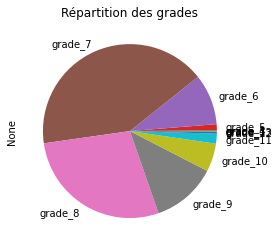

In [25]:
grade_counts = df[['grade_1', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13']].sum()
grade_counts.plot(kind='pie')
plt.title('Répartition des grades')
plt.show()


la répartition relative des différentes catégories de grades des maisons. et le grade vedette est 7 suivie de 8 et 6 et 9

# le model

In [29]:
surface = df['sqft_living']


In [30]:
surface_1 = surface[0]


In [32]:
# Séparer les variables indépendantes (surface_home) et dépendante (loyer)
X = df[['sqft_living']]  
y = df['price']  

# Instancier le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données
model.fit(X, y)

# Obtenir les paramètres du modèle
coefficient = model.coef_
intercept = model.intercept_

# Faire des prédictions sur de nouvelles données
new_surface = np.array([[0]])  
prediction = model.predict(new_surface)

# Évaluer les performances du modèle
r2_score = model.score(X, y)

# Afficher les résultats
print("Coefficient :", coefficient)
print("Intercept :", intercept)
print("Prédiction pour une surface de 5400 m2 :", prediction)
print("Score R2 :", r2_score)


Coefficient : [280.62934447]
Intercept : -43603.352521311026
Prédiction pour une surface de 5400 m2 : [-43603.35252131]
Score R2 : 0.4928694792505126


C:\Users\Asielle Wassa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Le coefficient de 280.62934447 indique que, pour chaque unité de variation dans la surface, la variable dépendante est susceptible de changer d'environ 280.63 unités dans la même direction.

L'intercept de -43603.352521311026 est la valeur prédite pour la variable dépendante lorsque la surface est égale à zéro. Cependant, dans la plupart des cas, cela n'aurait pas de sens pratique, car une surface de zéro n'est généralement pas réaliste.

La prédiction pour une surface de 5400 mètres carrés est donnée par le même intercept, soit -43603.35252131  alors on peut conculre que  , pour une surface de 5400 mètres carrés, la variable dépendante serait prédite à -43603.35252131.

Le score R2 de 0.4928694792505126 est une mesure de l'ajustement du modèle aux données. Il varie de 0 à 1, où 1 indique un ajustement parfait du modèle. Dans ce cas, un score R2 de 0.4928694792505126 indique que le modèle explique environ 49.29% de la variation observée dans la variable dépendante.


Régression linéaire univarié
1.	Pour avoir une meilleure idée du prix du loyer en fonction de la surface (surface_home), afficher le graphique en forme de nuage de point représentant le montant du loyer en fonction de la surface.
2.	Clairement, d'après la visualisation, que pouvez-vous donc émettre comme hypothèse hθ(x) de modélisation du phénomène surface par rapport au prix ?
3.	Remplacer les valeurs des paramètres   dans l’hypothèse hθ(x) et représenter graphiquement la droite qu'on a trouvée, pour vérifier qu'elle colle bien aux données.

4.	Maintenant qu’on a le paramètre optimal θ, utilisez le modèle pour effectuer des prédictions du loyer pour une surface de 5400 m2 et 12500 m2.

5.	Utilisez la fonction linear_model disponible dans package scikit-learn pour trouver la valeur des paramètres  .


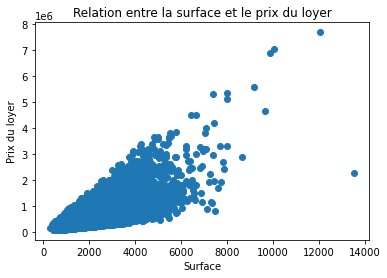

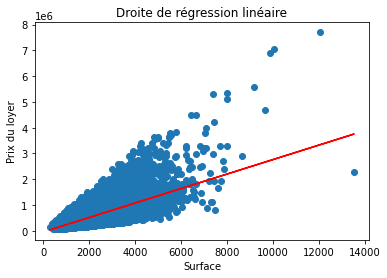

Prédictions pour une surface de 5400 m² et 12500 m² : [1471795.10764017 3464263.45340804]
Coefficient : [280.62934447]
Intercept : -43603.352521311026


C:\Users\Asielle Wassa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
# 1. Affichage du graphique en forme de nuage de points
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('Surface')
plt.ylabel('Prix du loyer')
plt.title('Relation entre la surface et le prix du loyer')
plt.show()

# 2. Hypothèse hθ(x) de modélisation
# Séparation des variables indépendantes (surface_home) et dépendante (loyer)
X = df[['sqft_living']]
y = df['price']

# 3. Entraînement du modèle et représentation graphique de la droite
model = LinearRegression()
model.fit(X, y)

plt.scatter(df['sqft_living'], df['price'])
plt.plot(df['sqft_living'], model.predict(X), color='red')
plt.xlabel('Surface')
plt.ylabel('Prix du loyer')
plt.title('Droite de régression linéaire')
plt.show()

# 4. Prédictions pour de nouvelles surfaces
new_surface = np.array([[5400], [12500]])
predictions = model.predict(new_surface)
print('Prédictions pour une surface de 5400 m² et 12500 m² :', predictions)

# 5. Utilisation de la fonction linear_model pour obtenir les paramètres
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)
coefficient = model_sklearn.coef_
intercept = model_sklearn.intercept_

print("Coefficient :", coefficient)
print("Intercept :", intercept)


Les résultats  sont  :

Prédictions pour une surface de 5400 m² et 12500 m² : [1471795.10764017 3464263.45340804]

Cela signifie que pour une surface de 5400 m², le modèle prédit un loyer d'environ 1 471 795.11, et pour une surface de 12500 m², le modèle prédit un loyer d'environ 3 464 263.45.

Coefficient : [280.62934447]

Cela indique que le coefficient de la variable indépendante (surface) dans le modèle de régression linéaire est d'environ 280.63. Cela suggère qu'une augmentation d'une unité dans la surface est associée à une augmentation d'environ 280.63 unités dans le prix du loyer, toutes choses étant égales par ailleurs.

Intercept : -43603.352521311026

L'intercept, également appelé terme constant, est d'environ -43,603.35. Cela représente la valeur attendue du prix du loyer lorsque la surface est égale à zéro (ce qui peut ne pas avoir de sens dans le contexte de votre modèle).



Régression linéaire multivarié
Maintenant qu’on a trouvé un premier modèle, il serait possible de tester plein d’hypothèses différentes pour aller plus loin et améliorer ses performances. 
On ajoute des caractéristiques :
•	bedrooms
•	bathrooms
•	surface_living
•	surface_home
•	floors
•	waterfront
•	view
•	condition
•	grade
•	year_built
•	year_renovated


1.	Utilisez la fonction linear_model disponible dans package scikit-learn pour trouver la valeur des paramètres θ = (θ0, θ1, θ2, θ3, θ4, θ5, θ6, θ7, θ8, θ9, θ10, θ11, θ12).
2.	
3.	Utilisez la fonction linear_model disponible dans package scikit-learn pour trouver la valeur des paramètres θ = (θ0, θ1, θ2, θ3, θ4, θ5, θ6, θ7, θ8, θ9, θ10, θ11, θ12).


In [34]:
# Sélection des caractéristiques
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'yr_built', 'yr_renovated']]

# Variable dépendante
y = df['price']

# Instanciation du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur les données
model.fit(X, y)

# Obtention des paramètres θ
theta = [model.intercept_] + list(model.coef_)

# Affichage des paramètres θ
print("Paramètres θ =", theta)


Paramètres θ = [5712421.997662525, -63491.8713262328, 59974.19892954105, 280.37951128249915, -0.33359883064986207, 56557.313655698454, 83058.7835138338, -2926.613868158372, 12.240356768206652]


Les valeurs des paramètres θ que vous avez obtenues sont :

θ₀ = 5712421.997662525
θ₁ = -63491.8713262328
θ₂ = 59974.19892954105
θ₃ = 280.37951128249915
θ₄ = -0.33359883064986207
θ₅ = 56557.313655698454
θ₆ = 83058.7835138338
θ₇ = -2926.613868158372
θ₈ = 12.240356768206652

Ces valeurs représentent les coefficients associés à chaque caractéristique respective dans votre modèle de régression linéaire multivariée. Elles indiquent la relation et l'impact de chaque caractéristique sur la variable dépendante (prix).

Par exemple, θ₀ représente l'intercept ou le biais du modèle, θ₁ est le coefficient associé à la variable 'bedrooms', θ₂ est le coefficient associé à la variable 'bathrooms', et ainsi de suite.

Ces paramètres θ peuvent être utilisés pour prédire les valeurs de la variable dépendante (prix) en utilisant l'équation de régression linéaire multivariée :

prix = θ₀ + θ₁ * bedrooms + θ₂ * bathrooms + θ₃ * sqft_living + θ₄ * sqft_lot + θ₅ * floors + θ₆ * view + θ₇ * yr_built + θ₈ * yr_renovated


In [35]:
# Caractéristiques pour la prédiction
bedrooms = 3
bathrooms = 2
sqft_living = 2000
sqft_lot = 5000
floors = 1.5
view = 1
yr_built = 1990
yr_renovated = 2010

# Calcul de la prédiction du prix
price_prediction = theta[0] + theta[1] * bedrooms + theta[2] * bathrooms + theta[3] * sqft_living + theta[4] * sqft_lot + theta[5] * floors + theta[6] * view + theta[7] * yr_built + theta[8] * yr_renovated

# Affichage du résultat de la prédiction
print("Prédiction du prix :", price_prediction)


Prédiction du prix : 569522.0834209742


La prédiction du prix obtenue est de 569522.0834209742.